In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df = df.rename(columns={'Unnamed: 0': 'number'})
df = df.set_index('number')

In [4]:
df


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
number,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [5]:
pd.unique(df['region'])

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
cities = ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville']

In [7]:
Part = df.loc[df['region'].isin(cities)]

(array([  3.,   9.,  18.,  51.,  95., 177., 164., 266., 393., 398., 510.,
        432., 400., 404., 373., 363., 465., 342., 420., 286., 226., 329.,
        199., 152., 166., 108.,  87.,  67.,  42.,  53.,  26.,  14.,  15.,
         18.,  14.,   3.,   5.,   4.,   0.,   1.]),
 array([0.44   , 0.50375, 0.5675 , 0.63125, 0.695  , 0.75875, 0.8225 ,
        0.88625, 0.95   , 1.01375, 1.0775 , 1.14125, 1.205  , 1.26875,
        1.3325 , 1.39625, 1.46   , 1.52375, 1.5875 , 1.65125, 1.715  ,
        1.77875, 1.8425 , 1.90625, 1.97   , 2.03375, 2.0975 , 2.16125,
        2.225  , 2.28875, 2.3525 , 2.41625, 2.48   , 2.54375, 2.6075 ,
        2.67125, 2.735  , 2.79875, 2.8625 , 2.92625, 2.99   ]),
 <BarContainer object of 40 artists>)

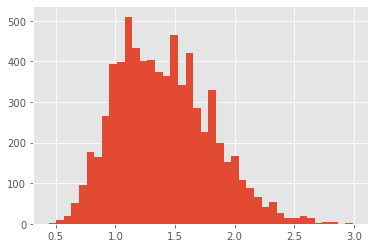

In [8]:
plt.hist(Part['AveragePrice'], bins=40)

In [9]:
res = stats.shapiro(Part['AveragePrice'])
print('p-value: ', res[1])

p-value:  4.202035841640362e-28


/home/stepan/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value получился маленьким (меньше  𝛼=0.01,0.05 )

(array([  1.,   0.,   2.,   2.,   3.,   1.,   3.,   7.,   3.,   3.,  10.,
         11.,  14.,  21.,  29.,  32.,  23.,  32.,  54.,  52.,  50.,  56.,
         28.,  51.,  64.,  88., 103.,  91.,  49., 103., 131., 111., 138.,
         73., 135., 142., 151., 147., 160.,  59., 139., 144., 113., 118.,
         76., 163., 114., 110., 110., 121.,  79., 116., 116., 113., 137.,
        118.,  73., 154., 124., 107., 119.,  63., 103., 142., 115., 112.,
        107.,  51., 106.,  73.,  87.,  73.,  39.,  67.,  98., 102.,  89.,
         73.,  35.,  60.,  58.,  59.,  48.,  44.,  26.,  47.,  50.,  32.,
         41.,  17.,  35.,  26.,  22.,  27.,  25.,  17.,  21.,  16.,  17.,
         12.,   7.,  10.,  20.,  15.,  14.,  12.,   3.,   8.,   7.,   6.,
          3.,   5.,   2.,   4.,   1.,   8.,   6.,   4.,   4.,   6.,   2.,
          1.,   6.,   0.,   1.,   1.,   2.,   1.,   1.,   2.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.44      , 0.45821429, 0.47642857, 0.49464286

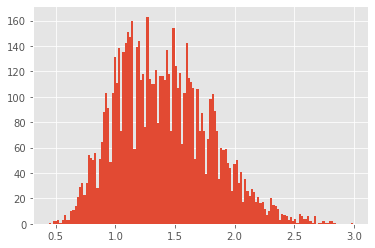

In [10]:
plt.hist(Part['AveragePrice'], bins=140)

In [22]:
x = Part[Part['type'] == 'conventional']['AveragePrice']
y = Part[Part['type'] == 'organic']['AveragePrice']
x.name, y.name = 'corner', 'not corner'

In [24]:
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

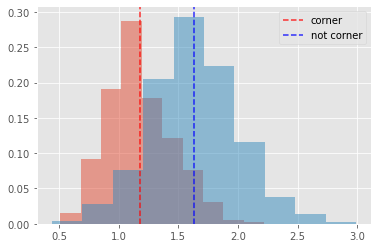

In [28]:
two_histograms(x, y)

In [29]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.0


In [30]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value:  0.0


In [32]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  0.0
